In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [204]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [212]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [205]:
# this module ignores warnings
#import warnings
#warnings.filterwarnings(action='ignore')

## Loading Data

In [3]:
data = pd.read_csv('Dataset\FuelConsumption.csv')

In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df = data.copy()

## Exploratory Data Analysis & Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [8]:
df.MODELYEAR.value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [9]:
df.drop(columns=['MODELYEAR'], inplace=True)

In [10]:
df.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [12]:
cat_cols = df.select_dtypes('object').columns

In [13]:
for col in cat_cols:
    counts = df[col].value_counts()
    print(counts)
    print('===================')

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50   

In [14]:
df.drop(columns=cat_cols, inplace=True)

In [15]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


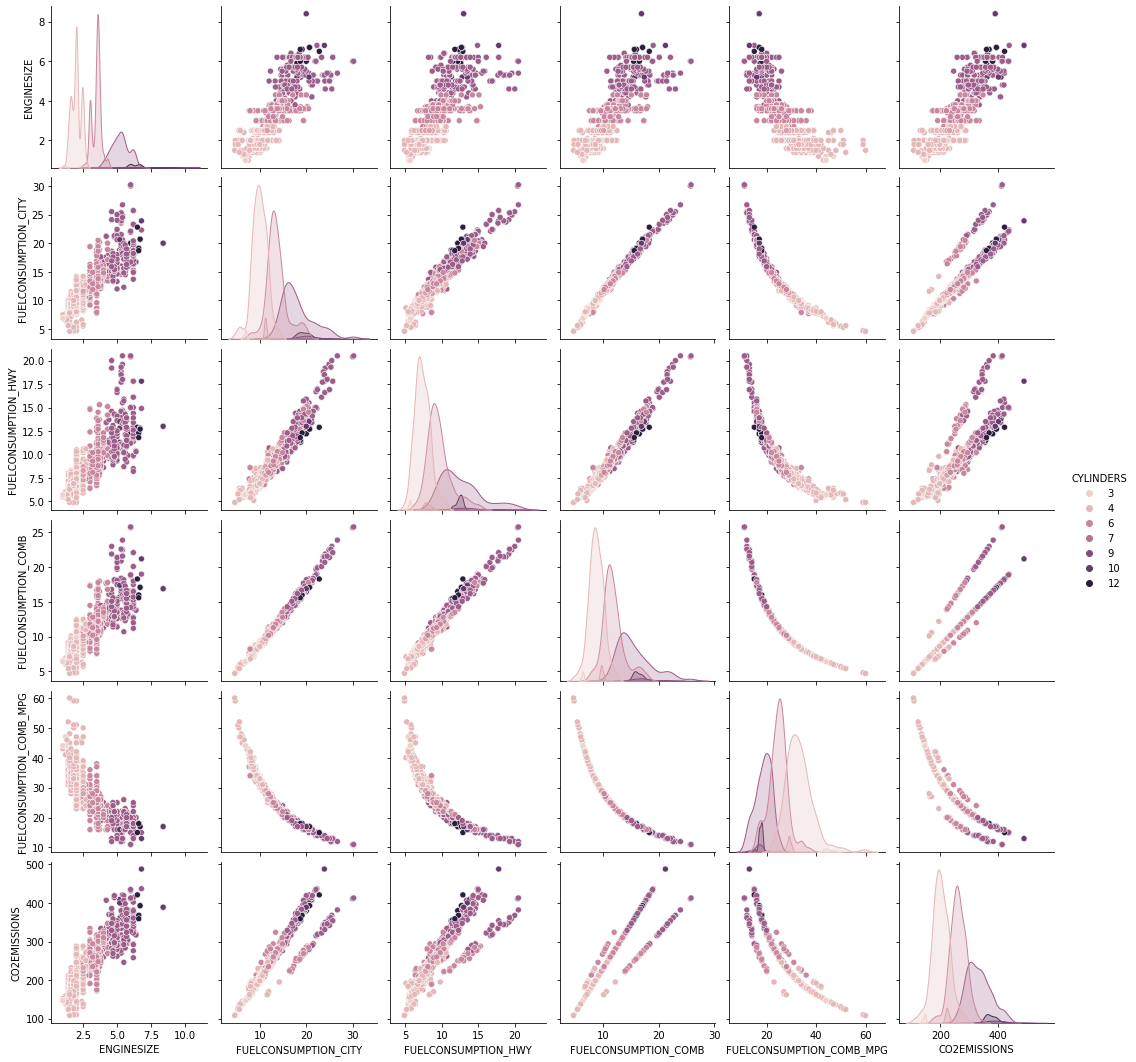

In [16]:
# paiplot create a grid of Axes such that each numeric variable in data will by shared across y-axes across a single row and
# x-axes across a single column, hue is name of variable in data to map plot aspects to different colors
sns.pairplot(df, hue='CYLINDERS')

In [17]:
df.corr()[['CO2EMISSIONS']].sort_values(by=['CO2EMISSIONS'], ascending=False)

,CO2EMISSIONS
CO2EMISSIONS,1.000000
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685
FUELCONSUMPTION_COMB_MPG,-0.906394


In [18]:
# droping FUELCONSUMPTION_COMB_MPG as it has negative correlation
df.drop(columns='FUELCONSUMPTION_COMB_MPG', inplace=True)

<AxesSubplot: >

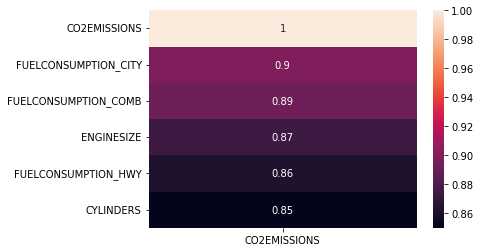

In [18]:
sns.heatmap(df.corr()[['CO2EMISSIONS']].sort_values(by=['CO2EMISSIONS'], ascending=False),annot=True) # annot will show value

In [19]:
df.shape

(1067, 6)

## Outlier Detection and Removal

<AxesSubplot: >

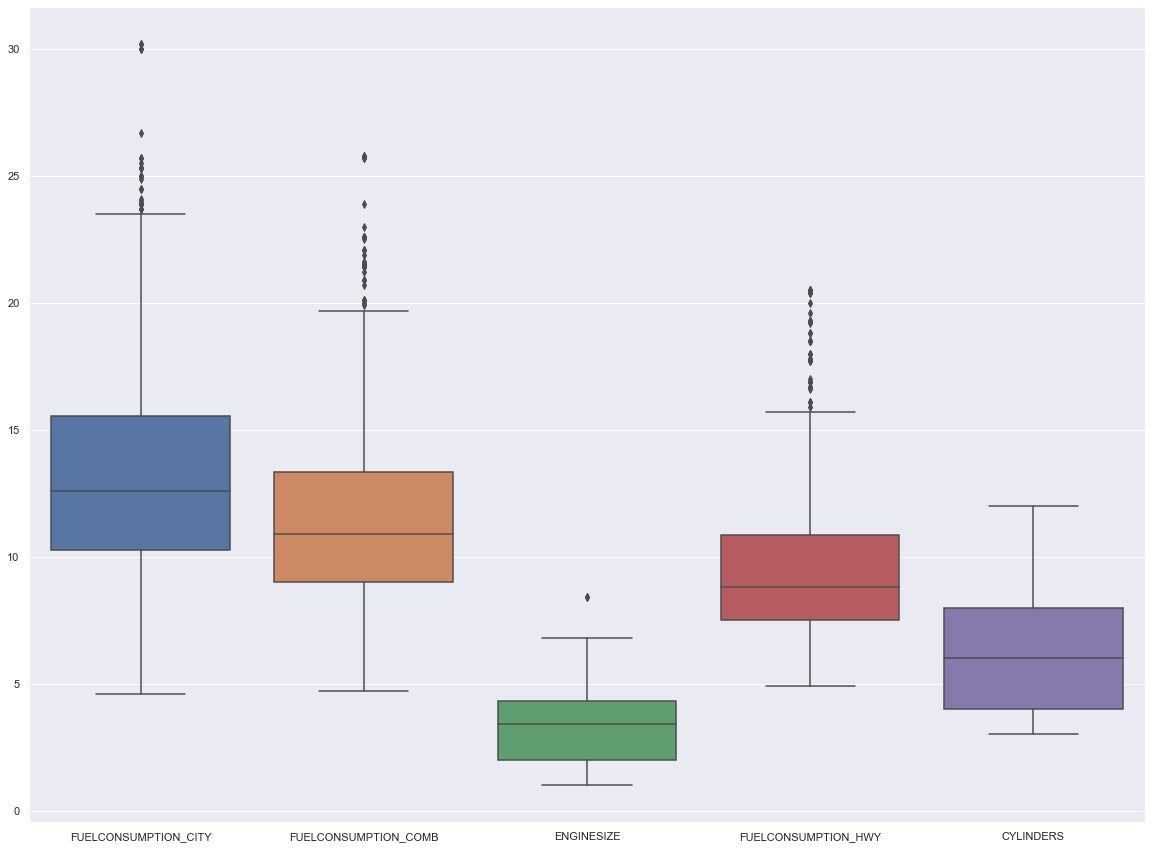

In [20]:
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.boxplot(data=df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS']])

###### test code for practice

In [21]:
# test code
df2 = df.copy()
df2.shape

(1067, 6)

In [22]:
Q1 = df2.FUELCONSUMPTION_CITY.quantile(0.25)
Q3 = df2.FUELCONSUMPTION_CITY.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(2.299999999999999, 23.5)

In [23]:
df2[(df2.FUELCONSUMPTION_CITY<=lower_limit)|(df2.FUELCONSUMPTION_CITY>=upper_limit)].shape

(28, 6)

In [24]:
df2 = df2[(df2.FUELCONSUMPTION_CITY>lower_limit)&(df2.FUELCONSUMPTION_CITY<upper_limit)]
df2.shape

(1039, 6)

In [25]:
dfx = df2[(df2.FUELCONSUMPTION_CITY>lower_limit)&(df2.FUELCONSUMPTION_CITY<upper_limit)]
dfx.shape

(1039, 6)

In [26]:
Q1 = df2.FUELCONSUMPTION_COMB.quantile(0.25)
Q3 = df2.FUELCONSUMPTION_COMB.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df2[(df2.FUELCONSUMPTION_COMB<=lower_limit)|(df2.FUELCONSUMPTION_COMB>=upper_limit)].shape

(6, 6)

In [27]:
df2 = df2[(df2.FUELCONSUMPTION_COMB>lower_limit)&(df2.FUELCONSUMPTION_COMB<upper_limit)]
df2.shape

(1033, 6)

In [28]:
Q1 = df2.ENGINESIZE.quantile(0.25)
Q3 = df2.ENGINESIZE.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df2[(df2.ENGINESIZE<=lower_limit)|(df2.ENGINESIZE>=upper_limit)].shape

(2, 6)

In [29]:
df2 = df2[(df2.ENGINESIZE>lower_limit)&(df2.ENGINESIZE<upper_limit)]
df2.shape

(1031, 6)

In [30]:
Q1 = df2.FUELCONSUMPTION_HWY.quantile(0.25)
Q3 = df2.FUELCONSUMPTION_HWY.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df2[(df2.FUELCONSUMPTION_HWY<=lower_limit)|(df2.FUELCONSUMPTION_HWY>=upper_limit)].shape

(15, 6)

In [31]:
df2 = df2[(df2.FUELCONSUMPTION_HWY>lower_limit)&(df2.FUELCONSUMPTION_HWY<upper_limit)]
df2.shape

(1016, 6)

In [32]:
Q1 = df2.CYLINDERS.quantile(0.25)
Q3 = df2.CYLINDERS.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df2[(df2.CYLINDERS<=lower_limit)|(df2.CYLINDERS>=upper_limit)].shape

(23, 6)

In [33]:
df2 = df2[(df2.CYLINDERS>lower_limit)&(df2.CYLINDERS<upper_limit)]
df2.shape

(993, 6)

<AxesSubplot: >

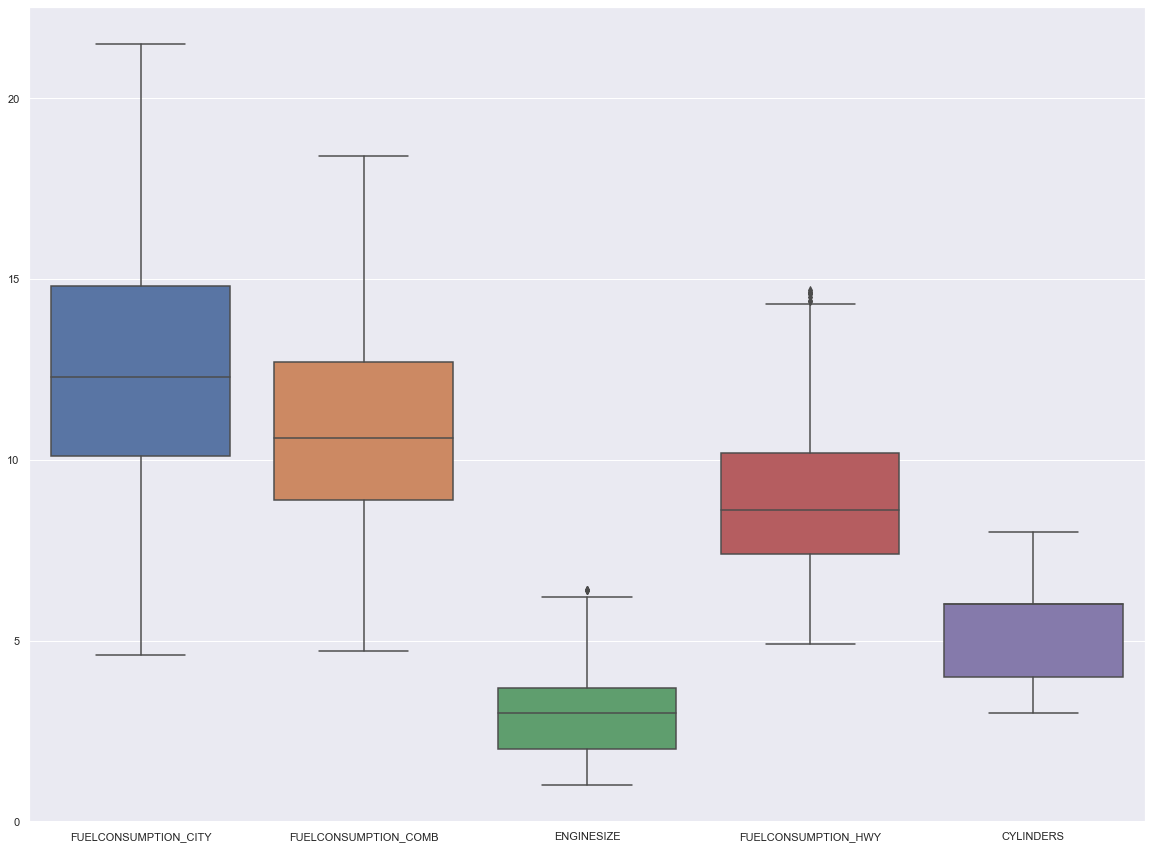

In [34]:
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.boxplot(data=df2[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS']])

In [35]:
len(df2) - len(df2[(df2.FUELCONSUMPTION_CITY>lower_limit)&(df2.FUELCONSUMPTION_CITY<upper_limit)])

868

In [36]:
(len(df2) - len(df2[(df2.FUELCONSUMPTION_CITY>lower_limit)&
                    (df2.FUELCONSUMPTION_CITY<upper_limit)])) == len(df2[(df2['FUELCONSUMPTION_CITY']<=lower_limit)|
                                                                             (df2['FUELCONSUMPTION_CITY']>=upper_limit)])

True

### Outlier Detection and Removal using function

In [37]:
# main code 
df3=df.copy()
df3.shape

(1067, 6)

In [38]:
class OutlierTreatment:
    
    def __init__(self, dff):
        self.dff = dff
        
    def getInfo(self):
        return (self.dff.shape)
    
    def outlier(self):
        Q1 = self.dff.quantile(0.25)
        Q3 = self.dff.quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        return lower_limit, upper_limit
        
    def countoutlier(self, dfa):
        self.lower_limit, self.upper_limit = self.outlier()
        Total_outlier = len(dfa[(self.dff <= self.lower_limit)|(self.dff >= self.upper_limit)])
        return Total_outlier
    
    def cleanoutlier(self, dfa):
        self.lower_limit, self.upper_limit = self.outlier()
        dfx = dfa[(self.dff>self.lower_limit)&(self.dff<self.upper_limit)]
        return dfx

In [39]:
# ruuning function to each column multiple time until any outlier left
columnslist = ['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS']
for i in columnslist:
    while True:
        d = OutlierTreatment(df3[i])
        d.getInfo()
        d.outlier()
        d.countoutlier(df3)
        if d.countoutlier(df3) == 0:
            break
        df3 = d.cleanoutlier(df3)
df3.shape

(992, 6)

In [40]:
df3.shape

(992, 6)

In [41]:
df4=df.copy()
# ruuning function to each column only one time until to remove outlier
columnslist = ['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS']
for i in columnslist:
        d = OutlierTreatment(df4[i])
        d.getInfo()
        d.outlier()
        d.countoutlier(df4)
        df4 = d.cleanoutlier(df4)
df4.shape

(993, 6)

<AxesSubplot: >

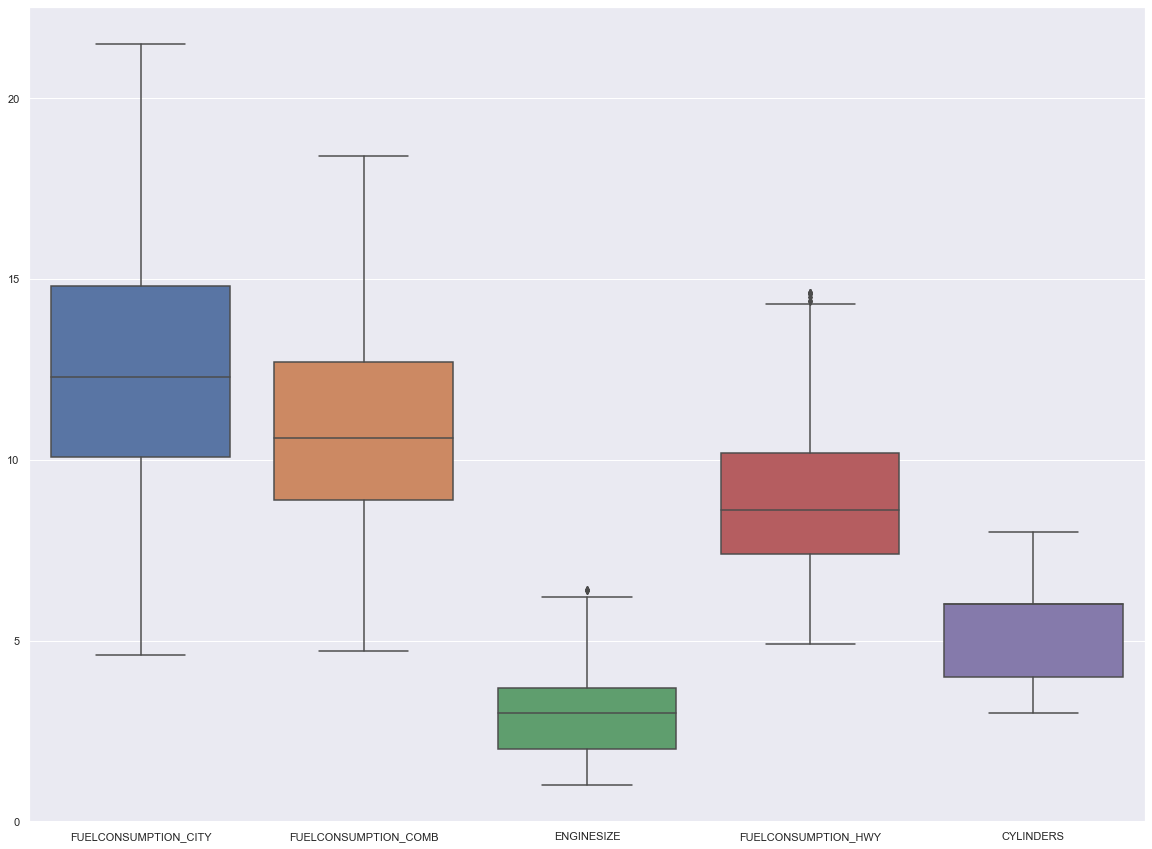

In [51]:
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.boxplot(data=df3[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS']])

In [42]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,992.0,3.175000,1.294317,1.0,2.000,3.0,3.7,6.4
CYLINDERS,992.0,5.553427,1.544225,3.0,4.000,6.0,6.0,8.0
FUELCONSUMPTION_CITY,992.0,12.621875,3.306392,4.6,10.075,12.3,14.8,21.5
FUELCONSUMPTION_HWY,992.0,9.001815,2.153456,4.9,7.400,8.6,10.2,14.6
FUELCONSUMPTION_COMB,992.0,10.996976,2.759790,4.7,8.875,10.6,12.7,18.4
CO2EMISSIONS,992.0,247.904234,56.550130,108.0,205.000,244.0,285.0,419.0


In [53]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,993.0,3.177241,1.295590,1.0,2.0,3.0,3.7,6.4
CYLINDERS,993.0,5.555891,1.545398,3.0,4.0,6.0,6.0,8.0
FUELCONSUMPTION_CITY,993.0,12.628600,3.311513,4.6,10.1,12.3,14.8,21.5
FUELCONSUMPTION_HWY,993.0,9.007553,2.159953,4.9,7.4,8.6,10.2,14.7
FUELCONSUMPTION_COMB,993.0,11.003223,2.765413,4.7,8.9,10.6,12.7,18.4
CO2EMISSIONS,993.0,248.053374,56.716668,108.0,205.0,244.0,285.0,419.0


## Feature Engineering and Selection

In [74]:
# using df3 dataframe to build model
df3.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'],
      dtype='object')

In [75]:
# Dataset Split
# random_state keeps same train and test data sets across each executions of this cell
xtrain, xtest, ytrain , ytest = train_test_split(
    df3.drop(columns=['CO2EMISSIONS']), df3[['CO2EMISSIONS']], test_size=0.2, random_state=33)

In [76]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(793, 5)
(793, 1)
(199, 5)
(199, 1)


#### Feature Selection

In [77]:
# Mutual information is a quantity that measures a relationship between two random variables that are sampled simultaneously
# MI(Mutual information) score fall in range from 0 to ∞, higher value indicates closer connection between feature and target
# which suggests to put that feature in training dataset
# ytrain is a dataframe, ytrain.values.reshape(-1,) changes into 1d array
scores = mutual_info_regression(xtrain, ytrain.values.reshape(-1,), random_state=33)
scores = pd.DataFrame(scores)
scores.index = xtrain.columns
scores.sort_values(by=0, ascending=False)

,0
FUELCONSUMPTION_COMB,4.120785
FUELCONSUMPTION_CITY,2.207556
FUELCONSUMPTION_HWY,1.641467
ENGINESIZE,0.946052
CYLINDERS,0.656677


###  Simple Linear Regression Modeling

In [78]:
# from Mutual information, FUELCONSUMPTION_COMB is better feature to build model as it has higher MI score than others
model = LinearRegression()
model.fit(xtrain[['FUELCONSUMPTION_COMB']], ytrain)

LinearRegression()

In [79]:
model.coef_

array([[18.30705448]])

In [80]:
model.intercept_

array([46.10264646])

In [81]:
# test code
# predicting on training set
model.predict(xtrain[['FUELCONSUMPTION_COMB']])[0:5]   # only showing first 5

array([[302.40140915],
       [307.89352549],
       [212.69684221],
       [252.97236206],
       [247.48024571]])

In [82]:
ytrain

,CO2EMISSIONS
725,224
425,229
41,246
1065,260
832,253
...,...
722,216
636,274
794,191
433,297


### Model Evaluation

In [83]:
# Model Evaluation on both train and test set based on Model Evaluation
ypred_train = model.predict(xtrain[['FUELCONSUMPTION_COMB']])
ypred_test = model.predict(xtest[['FUELCONSUMPTION_COMB']])

In [84]:
print("mean_absolute_error on train set: ",mean_absolute_error(y_true=ytrain, y_pred=ypred_train))
print("mean_absolute_error on test set: ",mean_absolute_error(y_true=ytest, y_pred=ypred_test))

print("mean_squared_error on train set: ",mean_squared_error(y_true=ytrain, y_pred=ypred_train))
print("mean_squared_error on test set: ",mean_squared_error(y_true=ytest, y_pred=ypred_test))

print("r2_score on train set: ",r2_score(y_true=ytrain, y_pred=ypred_train))
print("r2_score on test set: ",r2_score(y_true=ytest, y_pred=ypred_test))

mean_absolute_error on train set:  14.553111197434207
mean_absolute_error on test set:  13.106740617105995
mean_squared_error on train set:  573.1288244390577
mean_squared_error on test set:  405.84225560960454
r2_score on train set:  0.8184054162050275
r2_score on test set:  0.8787448341719021


#### Model Visualization

In [54]:
xtrain[['FUELCONSUMPTION_COMB']].describe().T

,count,mean,std,min,25%,50%,75%,max
FUELCONSUMPTION_COMB,793.0,11.008071,2.777886,4.7,8.9,10.6,12.8,18.4


In [55]:
# np.linspace generates linearly spaced values, here generating 200 spaced values between min amd max value
# creating dummy_x numpy.ndarray with sample data created with linspace    
dummy_x = np.linspace(4.7, 19, 200) 
dummy_x = dummy_x.reshape(-1, 1)
dummy_x.shape
#dummy_x

(200, 1)

In [56]:
# converting dummy_x numpy.ndarray to dataframe with columnname same as model columnname which is FUELCONSUMPTION_COMB
# any columnname other than FUELCONSUMPTION_COMB will raise warning for valid feature names that model were fitted
dftest = pd.DataFrame(dummy_x,columns=['FUELCONSUMPTION_COMB'])
dftest

,FUELCONSUMPTION_COMB
0,4.700000
1,4.771859
2,4.843719
3,4.915578
4,4.987437
...,...
195,18.712563
196,18.784422
197,18.856281
198,18.928141


In [57]:
# model.predict(dftest) and model.predict(dftest[['FUELCONSUMPTION_COMB']]) are same
ypred = model.predict(dftest)
ypred.shape

(200, 1)

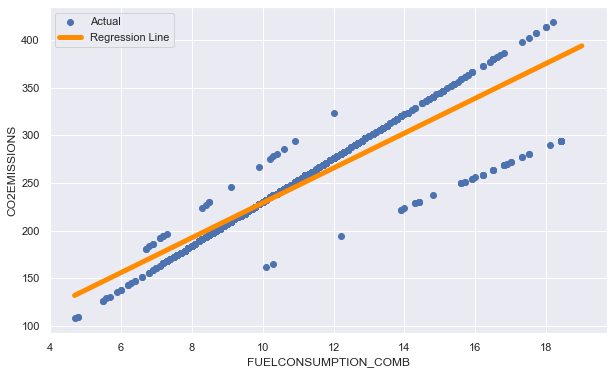

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['FUELCONSUMPTION_COMB']], ytrain, label='Actual')
plt.plot(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

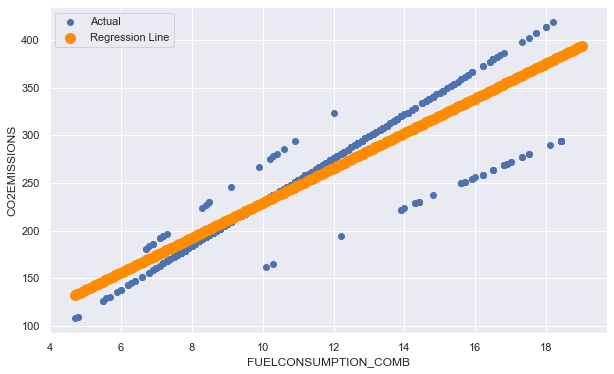

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['FUELCONSUMPTION_COMB']], ytrain, label='Actual')
plt.scatter(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

In [60]:
# visualization with train and test data
x_test = xtest[['FUELCONSUMPTION_COMB']]
x_test.shape

(199, 1)

In [61]:
ypred = model.predict(xtest[['FUELCONSUMPTION_COMB']])
ypred.shape

(199, 1)

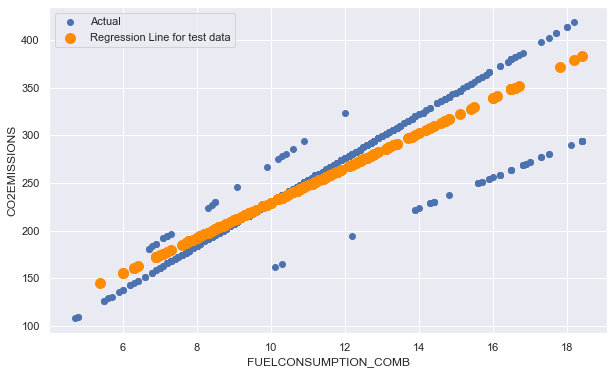

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['FUELCONSUMPTION_COMB']], ytrain, label='Actual')
plt.scatter(x_test, ypred, label='Regression Line for test data', color='darkorange', linewidth=5)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

##### Model with ENGINESIZE

In [63]:
model = LinearRegression()
model.fit(xtrain[['ENGINESIZE']], ytrain)
print(model.coef_)
print(model.intercept_)
# Model Evaluation on both train and test set based on Model Evaluation
ypred_train = model.predict(xtrain[['ENGINESIZE']])
ypred_test = model.predict(xtest[['ENGINESIZE']])

[[37.26382505]]
[129.5538295]


In [64]:
# Model Evaluation
print("mean_absolute_error on train set: ",mean_absolute_error(y_true=ytrain, y_pred=ypred_train))
print("mean_absolute_error on test set: ",mean_absolute_error(y_true=ytest, y_pred=ypred_test))

print("mean_squared_error on train set: ",mean_squared_error(y_true=ytrain, y_pred=ypred_train))
print("mean_squared_error on test set: ",mean_squared_error(y_true=ytest, y_pred=ypred_test))

print("r2_score on train set: ",r2_score(y_true=ytrain, y_pred=ypred_train))
print("r2_score on test set: ",r2_score(y_true=ytest, y_pred=ypred_test))

mean_absolute_error on train set:  22.40804942139273
mean_absolute_error on test set:  22.881492837715193
mean_squared_error on train set:  882.7410378953155
mean_squared_error on test set:  897.5552623088338
r2_score on train set:  0.7203054801296473
r2_score on test set:  0.7318337096080245


In [65]:
# Model Visualization
xtrain[['ENGINESIZE']].describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,793.0,3.1686,1.280323,1.0,2.0,3.0,3.7,6.4


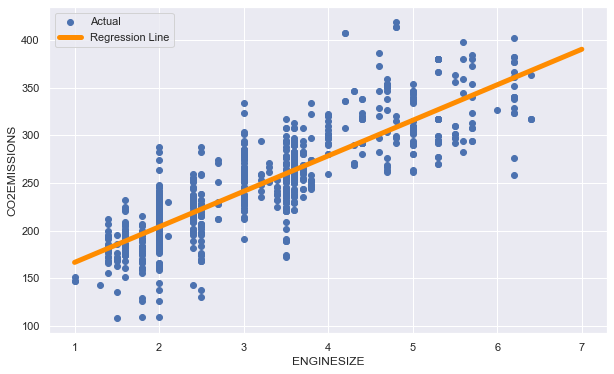

In [66]:
dummy_x = np.linspace(1, 7, 200) 
dummy_x = dummy_x.reshape(-1, 1)
dftest = pd.DataFrame(dummy_x,columns=['ENGINESIZE'])
ypred = model.predict(dftest)
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['ENGINESIZE']], ytrain, label='Actual')
plt.plot(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
plt.xlabel("ENGINESIZE")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

##### Model with CYLINDERS

In [67]:
model = LinearRegression()
model.fit(xtrain[['CYLINDERS']], ytrain)
print(model.coef_)
print(model.intercept_)
# Model Evaluation on both train and test set based on Model Evaluation
ypred_train = model.predict(xtrain[['CYLINDERS']])
ypred_test = model.predict(xtest[['CYLINDERS']])

[[30.64017282]]
[77.31036346]


In [68]:
# Model Evaluation
print("mean_absolute_error on train set: ",mean_absolute_error(y_true=ytrain, y_pred=ypred_train))
print("mean_absolute_error on test set: ",mean_absolute_error(y_true=ytest, y_pred=ypred_test))

print("mean_squared_error on train set: ",mean_squared_error(y_true=ytrain, y_pred=ypred_train))
print("mean_squared_error on test set: ",mean_squared_error(y_true=ytest, y_pred=ypred_test))

print("r2_score on train set: ",r2_score(y_true=ytrain, y_pred=ypred_train))
print("r2_score on test set: ",r2_score(y_true=ytest, y_pred=ypred_test))

mean_absolute_error on train set:  24.045189161454342
mean_absolute_error on test set:  23.488484556900527
mean_squared_error on train set:  940.4229138131349
mean_squared_error on test set:  935.2943039252948
r2_score on train set:  0.7020291069947564
r2_score on test set:  0.7205582603758496


In [69]:
# Model Visualization
xtrain[['CYLINDERS']].describe().T

,count,mean,std,min,25%,50%,75%,max
CYLINDERS,793.0,5.558638,1.537216,3.0,4.0,6.0,6.0,8.0


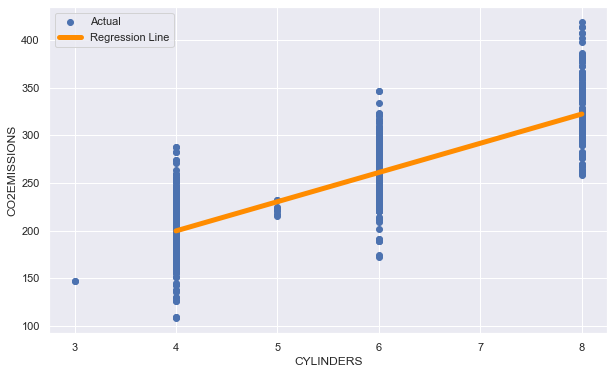

In [70]:
dummy_x = np.linspace(4, 8, 200) 
dummy_x = dummy_x.reshape(-1, 1)
dftest = pd.DataFrame(dummy_x,columns=['CYLINDERS'])
ypred = model.predict(dftest)
plt.figure(figsize=(10,6))
plt.scatter(xtrain[['CYLINDERS']], ytrain, label='Actual')
plt.plot(dummy_x, ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
plt.xlabel("CYLINDERS")
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

### Multiple Linear Regression

In [85]:
class Metrics:
    def evaluate(self, model, features, target):
        ypred = model.predict(features)
        mae = mean_absolute_error(y_true=target, y_pred=ypred)
        mse = mean_squared_error(y_true=target, y_pred=ypred)
        r2 = r2_score(y_true=target, y_pred=ypred)*100
        print(f"MAE :: {mae: .4f}")
        print(f"MSE :: {mse: .4f}")
        print(f"R2 :: {r2: .4f}")
        return [np.round(mae, 4), np.round(mse, 4), np.round(r2, 4)]

In [86]:
evaluator = Metrics()

In [87]:
# testing function for simple Linear Regression model that was build earlier
# for train set
print("Error Metrics for train set")
evaluator.evaluate(model, xtrain[['FUELCONSUMPTION_COMB']], ytrain)

Error Metrics for train set
MAE ::  14.5531
MSE ::  573.1288
R2 ::  81.8405


[14.5531, 573.1288, 81.8405]

In [88]:
# for test set
print("Error Metrics for test set")
evaluator.evaluate(model, xtest[['FUELCONSUMPTION_COMB']], ytest)

Error Metrics for test set
MAE ::  13.1067
MSE ::  405.8423
R2 ::  87.8745


[13.1067, 405.8423, 87.8745]

In [89]:
scores = mutual_info_regression(xtrain, ytrain.values.reshape(-1,), random_state=33)
scores = pd.DataFrame(scores)
scores.index = xtrain.columns
scores.sort_values(by=0, ascending=False)

,0
FUELCONSUMPTION_COMB,4.120785
FUELCONSUMPTION_CITY,2.207556
FUELCONSUMPTION_HWY,1.641467
ENGINESIZE,0.946052
CYLINDERS,0.656677


In [90]:
#features_names = scores.index[::2][::2]
features_names = features_names = scores.loc[['ENGINESIZE','FUELCONSUMPTION_COMB']].index
features_names

Index(['ENGINESIZE', 'FUELCONSUMPTION_COMB'], dtype='object')

In [91]:
model2 = LinearRegression()
model2.fit(xtrain[features_names], ytrain)

LinearRegression()

In [92]:
# for train set
print("Error Metrics for train set")
evaluator.evaluate(model2, xtrain[features_names], ytrain)

Error Metrics for train set
MAE ::  13.9190
MSE ::  474.4606
R2 ::  84.9668


[13.919, 474.4606, 84.9668]

In [93]:
# for test set
print("Error Metrics for test set")
evaluator.evaluate(model2, xtest[features_names], ytest)

Error Metrics for test set
MAE ::  12.4272
MSE ::  331.8574
R2 ::  90.0850


[12.4272, 331.8574, 90.085]

#### Multiple Linear Regression visualization

In [195]:
xtrain[features_names].describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,793.0,3.168600,1.280323,1.0,2.0,3.0,3.7,6.4
FUELCONSUMPTION_COMB,793.0,11.008071,2.777886,4.7,8.9,10.6,12.8,18.4


In [196]:
dummy_x1 = np.linspace(1.0, 7, 200).reshape(-1, 1)
dummy_x2 = np.linspace(4.7, 19, 200).reshape(-1, 1)

In [197]:
# concatenating two numpy array
dummy = np.c_[dummy_x1, dummy_x2]
dummy.shape

(200, 2)

In [198]:
dftest = pd.DataFrame(dummy,columns=['ENGINESIZE','FUELCONSUMPTION_COMB'])
dftest.shape

(200, 2)

In [199]:
#pred = model2.predict(dummy)
pred = model2.predict(dftest)
pred.shape

(200, 1)

In [200]:
# need to reshape as axes.plot3D takes input as 1D array, dummy[:, 0] and dummy[:, 1] are also 1D array
pred = pred.reshape(-1,)
pred.shape

(200,)

<IPython.core.display.Javascript object>


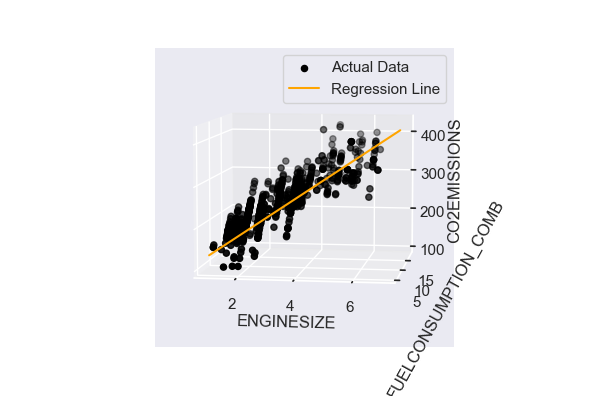

In [203]:
%matplotlib notebook
axes = plt.axes(projection='3d')
axes.scatter3D(
    xtrain[features_names[0]],
    xtrain[features_names[1]],
    ytrain, 
    label='Actual Data',
    color='black'
)
axes.plot3D(
    dummy[:, 0],
    dummy[:, 1],
    pred, 
    label='Regression Line',
    color='orange'
)
axes.set_xlabel(f'{features_names[0]}')
axes.set_ylabel(f'{features_names[1]}')
axes.set_zlabel(f'CO2EMISSIONS')
axes.legend()

### Crossvalidation

In [207]:
# Crossvalidation using KFold
# test code
kfold = KFold(n_splits=10)
for train_idx, test_idx in kfold.split(df3[features_names], df3.CO2EMISSIONS):
    print("train data index", train_idx.shape)
    print("test data index", test_idx.shape)

train data index (892,)
test data index (100,)
train data index (892,)
test data index (100,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)
train data index (893,)
test data index (99,)


In [208]:
# K Fold
eval_scores = []
kfold = KFold(n_splits=10)
for train_idx, test_idx in kfold.split(df3[features_names], df3.CO2EMISSIONS):
    # setting up data
    xtrain = df3[features_names].iloc[train_idx]
    xtest = df3[features_names].iloc[test_idx]
    ytrain = df3.CO2EMISSIONS.iloc[train_idx]
    ytest = df3.CO2EMISSIONS.iloc[test_idx]
    
    # modeling
    model3 = LinearRegression()
    model3.fit(xtrain, ytrain)
    
    # evaluation
    print("train_report")
    train_report = evaluator.evaluate(model=model3, features=xtrain, target=ytrain)
    print("rest_report")
    test_repot = evaluator.evaluate(model=model3, features=xtest, target=ytest)
    print('=====================================')
    eval_scores.append(test_repot)

train_report
MAE ::  14.0117
MSE ::  469.0236
R2 ::  85.7546
rest_report
MAE ::  10.7971
MSE ::  244.1034
R2 ::  89.4440
train_report
MAE ::  13.3835
MSE ::  453.8012
R2 ::  85.4137
rest_report
MAE ::  13.9376
MSE ::  370.2036
R2 ::  88.5844
train_report
MAE ::  11.0782
MSE ::  360.0730
R2 ::  88.8376
rest_report
MAE ::  20.3503
MSE ::  1317.3195
R2 ::  54.7799
train_report
MAE ::  12.4583
MSE ::  418.0355
R2 ::  86.3257
rest_report
MAE ::  18.1519
MSE ::  699.8053
R2 ::  84.2001
train_report
MAE ::  12.5232
MSE ::  409.8965
R2 ::  87.0290
rest_report
MAE ::  16.3146
MSE ::  774.4759
R2 ::  77.8939
train_report
MAE ::  13.3613
MSE ::  448.9409
R2 ::  86.2509
rest_report
MAE ::  13.0417
MSE ::  411.4049
R2 ::  83.7059
train_report
MAE ::  13.7430
MSE ::  462.3365
R2 ::  85.4576
rest_report
MAE ::  12.9119
MSE ::  301.4384
R2 ::  90.9586
train_report
MAE ::  13.9880
MSE ::  475.5608
R2 ::  84.9665
rest_report
MAE ::  8.3954
MSE ::  170.6383
R2 ::  94.3788
train_report
MAE ::  13.5408
MSE

In [209]:
eval_scores = np.array(eval_scores)
eval_scores

array([[  10.7971,  244.1034,   89.444 ],
       [  13.9376,  370.2036,   88.5844],
       [  20.3503, 1317.3195,   54.7799],
       [  18.1519,  699.8053,   84.2001],
       [  16.3146,  774.4759,   77.8939],
       [  13.0417,  411.4049,   83.7059],
       [  12.9119,  301.4384,   90.9586],
       [   8.3954,  170.6383,   94.3788],
       [  10.4781,  278.5463,   87.471 ],
       [  11.5621,  232.477 ,   92.1913]])

In [211]:
# order of metrics in array: MAE, MSE, R2 
eval_scores.mean(axis=0)

array([ 13.59407, 480.04126,  84.36079])

### Data Preprocessing - Standardization

Standardization entails scaling data to fit a standard normal distribution, A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1

In [213]:
df3.select_dtypes('float64').columns

Index(['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB'],
      dtype='object')

In [215]:
cont_cols = df3.select_dtypes('float64').columns

In [216]:
scaler = StandardScaler()

In [217]:
df3[cont_cols] = scaler.fit_transform(df3[cont_cols])

In [218]:
df3.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,-0.908272,4,-0.823631,-1.069432,-0.905227,196
1,-0.599073,4,-0.430255,-0.604828,-0.506445,221
2,-1.294771,4,-2.003760,-1.487576,-1.847803,136
3,0.251224,6,0.023640,0.045617,0.037349,255
4,0.251224,6,-0.157918,-0.140224,-0.143915,244


In [219]:
xtrain, xtest, ytrain , ytest = train_test_split(
    df3.drop(columns=['CO2EMISSIONS']), df3[['CO2EMISSIONS']], test_size=0.2, random_state=33)

In [220]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(793, 5)
(793, 1)
(199, 5)
(199, 1)


In [222]:
features_names

Index(['ENGINESIZE', 'FUELCONSUMPTION_COMB'], dtype='object')

In [228]:
model4 = LinearRegression()
model4.fit(xtrain[features_names], ytrain)

LinearRegression()

In [229]:
print("Error Metrics for train set")
evaluator.evaluate(model4, xtrain[features_names], ytrain)

Error Metrics for train set
MAE ::  13.9190
MSE ::  474.4606
R2 ::  84.9668


[13.919, 474.4606, 84.9668]

In [230]:
print("Error Metrics for test set")
evaluator.evaluate(model4, xtest[features_names], ytest)

Error Metrics for test set
MAE ::  12.4272
MSE ::  331.8574
R2 ::  90.0850


[12.4272, 331.8574, 90.085]

In [231]:
xtrain[features_names].describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,793.0,-0.004947,0.989687,-1.681270,-0.908272,-0.135275,0.405824,2.492918
FUELCONSUMPTION_COMB,793.0,0.004022,1.007065,-2.282838,-0.760215,-0.143915,0.653649,2.683813


In [253]:
dummy_x1 = np.linspace(xtrain[features_names[0]].min(), xtrain[features_names[0]].max(), 200).reshape(-1, 1)
dummy_x2 = np.linspace(xtrain[features_names[1]].min(), xtrain[features_names[1]].max(), 200).reshape(-1, 1)

In [254]:
# concatenating two numpy array
dummy = np.c_[dummy_x1, dummy_x2]
dummy.shape

(200, 2)

In [255]:
dftest = pd.DataFrame(dummy,columns=['ENGINESIZE','FUELCONSUMPTION_COMB'])
dftest.shape

(200, 2)

In [256]:
pred = model4.predict(dftest)
pred.shape

(200, 1)

In [257]:
pred = pred.reshape(-1,)
pred.shape

(200,)

<IPython.core.display.Javascript object>


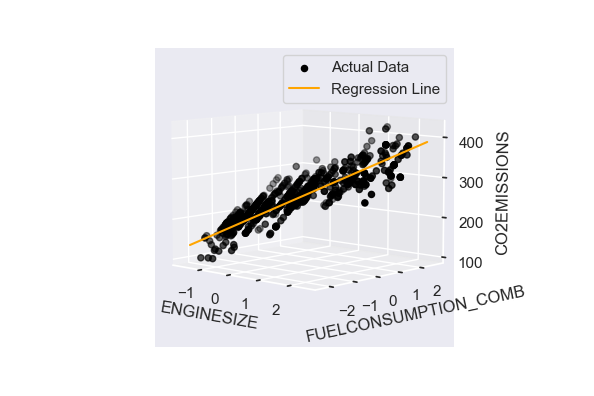

In [258]:
%matplotlib notebook
axes = plt.axes(projection='3d')
axes.scatter3D(
    xtrain[features_names[0]],
    xtrain[features_names[1]],
    ytrain, 
    label='Actual Data',
    color='black'
)
axes.plot3D(
    dummy[:, 0],
    dummy[:, 1],
    pred, 
    label='Regression Line',
    color='orange'
)
axes.set_xlabel(f'{features_names[0]}')
axes.set_ylabel(f'{features_names[1]}')
axes.set_zlabel(f'CO2EMISSIONS')
axes.legend()

In [269]:
# visualization with train and test data
pred = model4.predict(xtest[features_names])
pred.shape

(199, 1)

In [271]:
pred = pred.reshape(-1,)
pred.shape

(199,)

<IPython.core.display.Javascript object>


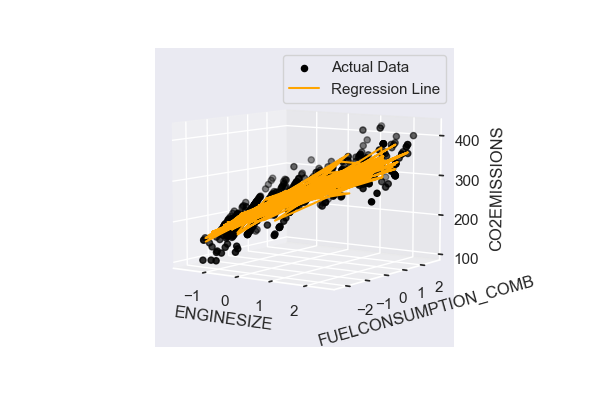

In [272]:
%matplotlib notebook
axes = plt.axes(projection='3d')
axes.scatter3D(
    xtrain[features_names[0]],
    xtrain[features_names[1]],
    ytrain, 
    label='Actual Data',
    color='black'
)
axes.plot3D(
    xtest[features_names[0]],
    xtest[features_names[1]],
    pred, 
    label='Regression Line',
    color='orange'
)
axes.set_xlabel(f'{features_names[0]}')
axes.set_ylabel(f'{features_names[1]}')
axes.set_zlabel(f'CO2EMISSIONS')
axes.legend()

## Pipeline

In [273]:
# here ScalerObject and ModelName are step names, it can be anything, verbose=True will show info about every pipeline steps
pipeline = Pipeline([('ScalerObject', scaler), ('ModelName', model4)], verbose=True)

In [279]:
pipeline.fit(xtrain[features_names], ytrain)

[Pipeline] ...... (step 1 of 2) Processing ScalerObject, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing ModelName, total=   0.0s


Pipeline(steps=[('ScalerObject', StandardScaler()),
                ('ModelName', LinearRegression())],
         verbose=True)

In [280]:
evaluator.evaluate(model=pipeline, features=xtrain[features_names],target=ytrain)

MAE ::  13.9190
MSE ::  474.4606
R2 ::  84.9668


[13.919, 474.4606, 84.9668]

### Saving and Loading Model

In [281]:
from joblib import dump, load
# Saving Loading Model
dump(pipeline,'Models/CO2EMISSIONPipeline')

['Models/CO2EMISSIONPipeline']

In [282]:
# Loading Model
pipeline1 = load('Models/CO2EMISSIONPipeline')

In [283]:
evaluator.evaluate(model=pipeline1, features=xtrain[features_names],target=ytrain)

MAE ::  13.9190
MSE ::  474.4606
R2 ::  84.9668


[13.919, 474.4606, 84.9668]

### K-Nearest Neighbor(KNN) Algorithm

In [285]:
#knn = KNeighborsRegressor?
knn = KNeighborsRegressor(n_neighbors=7)
pipeline_knn = Pipeline([('scaler', scaler), ('model', knn)], verbose=True)

In [286]:
pipeline_knn.fit(xtrain[features_names], ytrain)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=7))],
         verbose=True)

In [287]:
evaluator.evaluate(model=pipeline_knn, features=xtrain[features_names],target=ytrain)

MAE ::  4.5525
MSE ::  144.0160
R2 ::  95.4369


[4.5525, 144.016, 95.4369]

In [288]:
evaluator.evaluate(model=pipeline_knn, features=xtest[features_names],target=ytest)

MAE ::  3.9713
MSE ::  107.9081
R2 ::  96.7760


[3.9713, 107.9081, 96.776]